## 1) (2 points) Consider a random variable Y which has population mean μ and population standard deviation σ. Suppose we are testing 

$$
H_0: \mu \geq 71
$$

$$
H_a: \mu < 71
$$

vs. at $\alpha=0.05$




## a)	(1 point) Assume that the sample size is $n = 144$ and the sample standard deviation is $s = 24$. What is the probability of a Type II error and the power at  $\mu_a = 68$? Show all of your work.

## $Z$ version 

$$
\beta = P(Z \leq |Z_{\alpha}| + \frac{|\mu_a - \mu_0|}{\frac{\sigma}{\sqrt{n}}})
$$

In [89]:
n<-144
s <- 24
alpha <- 0.05
z_alph <- abs(qnorm(0.05))
mu_0 <- 71
mu_a <- 68

beta<- pnorm(z_alph - abs(mu_0-mu_a)/(s/sqrt(n)))

tab<-matrix(c(beta, 1-beta), ncol=2,nrow=1)

colnames(tab) <- c("beta", "power")

tab

beta,power
0.5575868,0.4424132


## b)	(1 point) What is an adequate sample size needed to achieve a power of 0.99 at $\mu_a=68$ assuming $\alpha=0.05$?  Show all of your work.

$$
n = \sigma^2\frac{(z_\alpha + z_\beta)^2}{(\mu_0 - \mu_a)^2}
$$

In [90]:
z_beta <- abs(qnorm(.01))

n <- (s^2*(z_alph + z_beta)^2)/(mu_a - mu_0)^2
n

[1] 1009.308

## 2)	(3 points) A city planner is interested in reducing traffic during rush hour. In particular they are concerned with how long it takes for a car to pass through a specific highly congested one-mile stretch of highway. Thus, the city planner collected the following data on how long it takes for 10 cars (in seconds) to drive through this stretch of highway during rush hour.


## a)	(1 point) Prior to the collection of these above data, the city planner assured the mayor it would take a population mean of $\mu = 250$ seconds to drive through this stretch of highway. Do these data suggest that it the actual mean time to completion is less than 250 seconds? Please show all of your work, and feel free to compare your results with R, SAS or Excel.


$$
H_0: \mu \geq 250
$$
$$
H_a: \mu < 250
$$

Pick $\alpha = 0.05$, as $\sigma$ is unknown then we will use a t-test.

$$
t = \frac{\sqrt{n}(\bar{Y} - \mu_0)}{s} \sim t_{df=n-1}
$$

In [91]:
data <- c(351.23, 304.20,
          248.94,299.53,
          320.66,298.13,
          201.63,307.58,
          291.47,314.95)

t <- t.test(data,alternative = "less", mu = 250)

In [92]:
t$statistic

t 
3.358496

In [93]:
t_crit <- qt(0.05, df=length(data)-1)
t_crit

[1] -1.833113

#### The t-statistic is approximately 3.35, and therefore far from the critical value of approximately -1.83, we therefore fail to reject the null hypothesis.

## b)	(2 points) Use the figures from Table 3 of the appendix of your book (or from the notes), which shows the probability of a Type II error for small samples, to determine the probability of a Type II error, β, and the power if the true mean of time it takes to drive through this one-mile stretch of highway is μ = 280 seconds. You can use the sample standard deviation, s, as your estimate of the population standard deviation σ.


In [94]:
install.packages("pwr", repos='http://cran.us.r-project.org')


The downloaded source packages are in
	‘/private/var/folders/44/z41l8sf111x6k2bjrjbdjhl80000gn/T/RtmpvwGQbj/downloaded_packages’


In [95]:
library(pwr)

In [96]:
s <- sd(data)
n <- length(data)
pwr.t.test(n=n, d=(250-280)/s, sig.level=0.05, type="one.sample", alternative="less")


     One-sample t test power calculation 

              n = 10
              d = -0.7269002
      sig.level = 0.05
          power = 0.6831113
    alternative = less


Instead of the tables in Appendix of the book, I used the pwr.t.test function in R, which return an answer of roughly $0.68$ which is close to the table result of $0.65$

## 3) (3 points) Suppose that a telecommunications researcher is interested in measuring the maximum range in which 21 AM radio stations in Illinois can be picked up. The file “HW4.Q3.txt” contains data on the range of these stations (in miles).  


In [97]:
data <- scan(text = "
94.37
126.43
154.13
128.53
172.57
69.51
78.05
149.34
181.54
167.28
116.17
191.84
120.99
290.92
277.57
289.43
291.49
288.67
297.16
257.44
315.4
"
)
data


[1]  94.37 126.43 154.13 128.53 172.57  69.51  78.05 149.34 181.54 167.28
[11] 116.17 191.84 120.99 290.92 277.57 289.43 291.49 288.67 297.16 257.44
[21] 315.40


	Shapiro-Wilk normality test

data:  t(data)
W = 0.89504, p-value = 0.02807


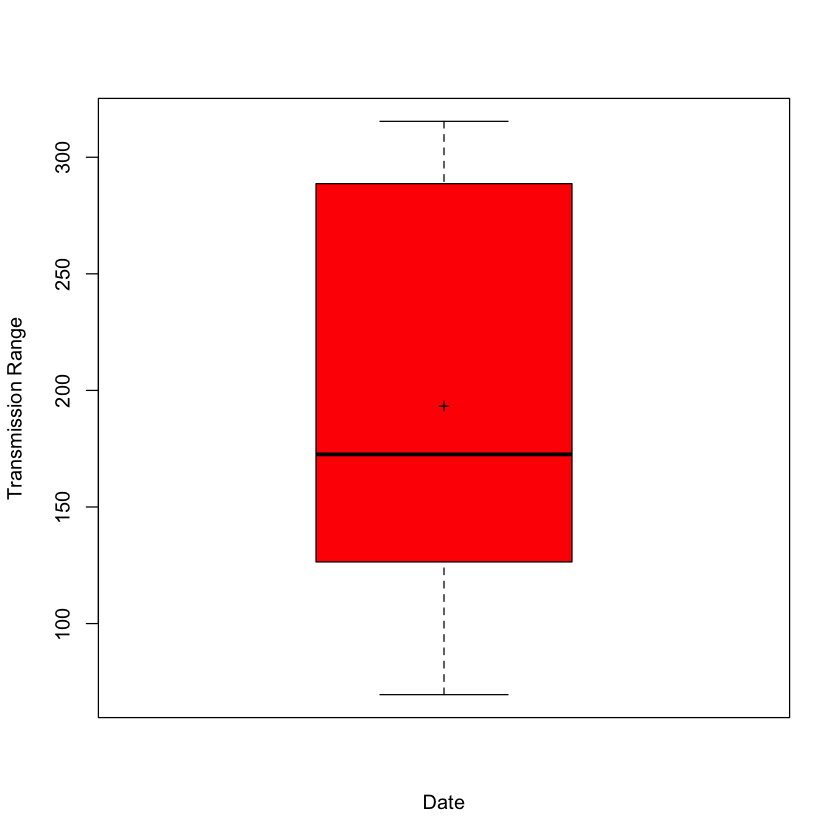

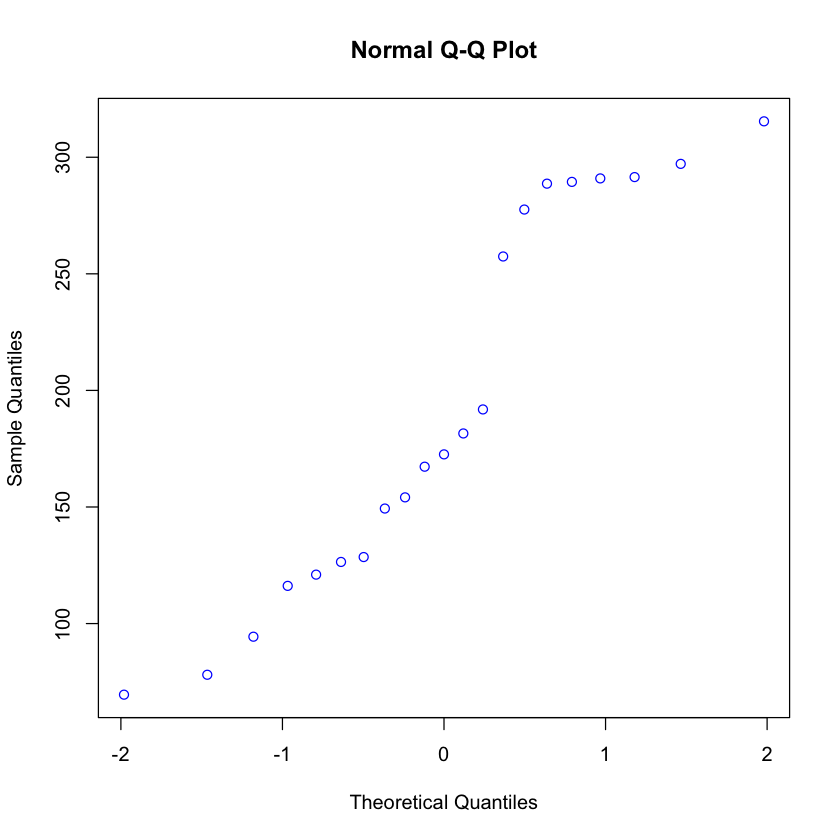

In [98]:

#Conduct the Shapiro-Wilk test for normality
shapiro.test(t(data))

#Make a box plot. This will be saved into your working directory

boxplot(data, col = "Red", 
          xlab = "Date", ylab = "Transmission Range")
 points(mean(t(data)), pch = 3, cex = 0.75) #Adds the mean, which is indicated by the "+" symbol



#Make a QQ-plot
qqnorm(t(data), col = "Blue")




#### The Shapiro-Wilks test tests the null that:

$$
H_0: X_1, X_2, ... X_n \sim N(\mu, \sigma^2)
$$
v.s.

$$
H_A: X_1, X_2, ..., X_n \not \sim N(\mu, \sigma^2)
$$

As the p-value is less than $\alpha=0.05$, then we can reject the null hypothesis that the sample is normally distributed and conclude that there is sufficient evidence to support the assertion that $X_1, X_2, ..., X_n \not \sim N(\mu, \sigma^2)$

#### a)	(1 point) Does a typical AM radio station have a range greater than 160 miles? By hand, use a Sign Test at $\alpha=0.05$


$$
H_0: M \leq 160
$$

$$
H_a: M > 160
$$

Then let $W_i = Y_i - 160$. Then all of the $W_i$'s that are greater than 160, is a binomial random variable with $n = 21, p_0 = 0.5$, thus we test whether 

$$
B = \text{ number of values greater than 160}
$$

against a critical value of $n - C_{\alpha, n}$, which is $15$.

In [99]:
diff_data <- data - 160
diff_data

[1] -65.63 -33.57  -5.87 -31.47  12.57 -90.49 -81.95 -10.66  21.54   7.28
[11] -43.83  31.84 -39.01 130.92 117.57 129.43 131.49 128.67 137.16  97.44
[21] 155.40

In [100]:
B <- sum(diff_data > 0)
B

[1] 12

In [101]:
n <- length(data)
C <- qbinom(0.05, prob=0.5, size=n) - 1
C_crit <- n - C
C_crit

[1] 15

#### We then reject if $B > C_crit$, which it is not, thus we fail to reject the null hypothesis that the median is less than 160. 

In [102]:
L <- qbinom(0.025, prob=.5, size= n) 
U <- n-(qbinom(0.025, prob=.5, size = n)-1)
L
U

[1] 6

[1] 16

In [103]:
data <- data[order(data)]

data[6]
data[16]

[1] 126.43

[1] 288.67

#### Thus, $126.43 \leq M \leq 288.67$ with .95 statistical confidence.

## 4) a. Do the data provide enough evidence to indicate that the container ships displace more tonnage than the tanker ships? 
Use α = 0.05. Show all seven steps of the hypothesis test and give a complete conclusion.

In [104]:
tanker_ship <- scan(text="
75.49
62.15
57.61
79.94
52.51
65.02
59.76
71.24
62.85
81.98
51.58
70.39
75.49")

container_ship <- scan(text="
62.12
62.55
63.16
44.63
53.11
41.33
62.79
29.55
68.48
34.06
64.95
57.86
62.08
56.00
60.88")

length(tanker_ship)
length(container_ship)
t.test(x=container_ship, y=tanker_ship, alternative="greater")

[1] 13

[1] 15


	Welch Two Sample t-test

data:  container_ship and tanker_ship
t = -2.8272, df = 25.978, p-value = 0.9955
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -18.77921       Inf
sample estimates:
mean of x mean of y 
 54.90333  66.61615 


$H_0: \mu_{container} - \mu_{tanker} \leq 0 \text{ v.s. } H_a:  \mu_{container} - \mu_{tanker} > 0$

$n_{tank} = 13, n_{container} = 15$

$df_{pool} = 13 + 15 -2 = 26$

$\alpha = 0.05, p < alpha \Rightarrow Reject$

$t = -2.8272$

$p > \alpha$

At $\alpha = 0.05$, I fail to reject $H_0$ and conclude that there is insufficent evidence to support the assertion that container ships displace more tonnage than tanker ships.

## b) By hand, construct a 95% CI for the mean difference in displacement between tanker ships and container ships. Interpret the interval.

In [105]:
df_pool <- 26
n_2 <- length(tanker_ship)
n_1 <- length(container_ship)
t_alpha <- qt(0.025, df=df_pool -1)
s_p <- sqrt(((n_1 - 1)*var(container_ship)+(n_2-1)*var(tanker_ship))/(n_1+n_2-2))
se <- s_p*sqrt(1/n_1 + 1/n_2)

x_bar_diff <- mean(container_ship) - mean(tanker_ship)

x_bar_diff + c(-1,1)*abs(t_alpha)*se



[1] -20.357510  -3.068131

#### Thus, we are 95% confident that the true mean difference in the displacement is between approximately $-20.36$ and $-3.06$.